In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#load the yeast decoding time data from 
#Chu et al 2014
time_data = pd.read_csv('Data/decoding_time_data_Chu_2014.csv')
time_lookup = dict(zip(time_data['codon'],time_data['decoding.time']))

In [3]:
is_PETase = 'ATGAACTTTCCCCGCGCTTCCCGCCTGATGCAGGCCGCCGTTCTCGGCGGGCTGATGGCCGTGTCGGCCGCCGCCACCGCCCAGACCAACCCCTACGCCCGCGGCCCGAACCCGACAGCCGCCTCACTCGAAGCCAGCGCCGGCCCGTTCACCGTGCGCTCGTTCACCGTGAGCCGCCCGAGCGGCTACGGCGCCGGCACCGTGTACTACCCCACCAACGCCGGCGGCACCGTGGGCGCCATCGCCATCGTGCCGGGCTACACCGCGCGCCAGTCGAGCATCAAATGGTGGGGCCCGCGCCTGGCCTCGCACGGCTTCGTGGTCATCACCATCGACACCAACTCCACGCTCGACCAGCCGTCCAGCCGCTCGTCGCAGCAGATGGCCGCGCTGCGCCAGGTGGCCTCGCTCAACGGCACCAGCAGCAGCCCGATCTACGGCAAGGTCGACACCGCCCGCATGGGCGTGATGGGCTGGTCGATGGGCGGTGGCGGCTCGCTGATCTCGGCGGCCAACAACCCGTCGCTGAAAGCCGCGGCGCCGCAGGCCCCGTGGGACAGCTCGACCAACTTCTCGTCGGTCACCGTGCCCACGCTGATCTTCGCCTGCGAGAACGACAGCATCGCCCCGGTCAACTCGTCCGCCCTGCCGATCTACGACAGCATGTCGCGCAATGCGAAGCAGTTCCTCGAGATCAACGGTGGCTCGCACTCCTGCGCCAACAGCGGCAACAGCAACCAGGCGCTGATCGGCAAGAAGGGCGTGGCCTGGATGAAGCGCTTCATGGACAACGACACGCGCTACTCCACCTTCGCCTGCGAGAACCCGAACAGCACCCGCGTGTCGGACTTCCGCACCGCGAACTGCAGC'
#sc_PETase is the optimised ORF without S. cerevisiae signal sequence or HA tag
sc_PETase = 'ATGAACTTTCCGAGAGCGTCCAGATTGATGCAAGCGGCGGTCTTGGGTGGTTTGATGGCGGTCTCCGCGGCGGCGACTGCGCAAACTAACCCGTACGCGAGAGGTCCGAACCCGACTGCGGCGTCCTTGGAAGCGTCCGCGGGTCCGTTTACTGTCAGATCCTTTACTGTCTCCAGACCGTCCGGTTACGGTGCGGGTACTGTCTACTACCCGACTAACGCGGGTGGTACTGTCGGTGCGATTGCGATTGTCCCGGGTTACACTGCGAGACAATCCTCCATTAAATGGTGGGGTCCGAGATTGGCGTCCCATGGTTTTGTCGTCATTACTATTGACACTAACTCCACTTTGGACCAACCGTCCTCCAGATCCTCCCAACAAATGGCGGCGTTGAGACAAGTCGCGTCCTTGAACGGTACTTCCTCCTCCCCGATTTACGGTAAAGTCGACACTGCGAGAATGGGTGTCATGGGTTGGTCCATGGGTGGTGGTGGTTCCTTGATTTCCGCGGCGAACAACCCGTCCTTGAAAGCGGCGGCGCCGCAAGCGCCGTGGGACTCCTCCACTAACTTTTCCTCCGTCACTGTCCCGACTTTGATTTTTGCGTGCGAAAACGACTCCATTGCGCCGGTCAACTCCTCCGCGTTGCCGATTTACGACTCCATGTCCAGAAACGCGAAACAATTTTTGGAAATTAACGGTGGTTCCCATTCCTGCGCGAACTCCGGTAACTCCAACCAAGCGTTGATTGGTAAAAAAGGTGTCGCGTGGATGAAAAGATTTATGGACAACGACACTAGATACTCCACTTTTGCGTGCGAAAACCCGAACTCCACTAGAGTCTCCGACTTTAGAACTGCGAACTGCTCC'

In [4]:
#convert sequences into RNA codons then into decoding times
is_PETase = is_PETase.replace('T','U')
is_codons = [is_PETase[n:n+3] for n in range(0,len(is_PETase),3)]
is_times = []
for codon in is_codons:
    is_times.append(time_lookup[codon])
sc_PETase = sc_PETase.replace('T','U')
sc_codons = [sc_PETase[n:n+3] for n in range(0,len(sc_PETase),3)]
sc_times = []
for codon in sc_codons:
    sc_times.append(time_lookup[codon])

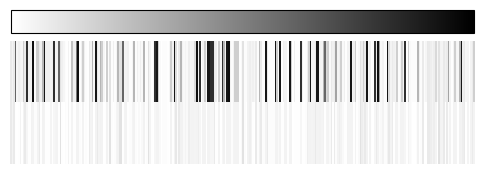

In [5]:
times_for_plotting = np.array([is_times, sc_times])
fig,ax = plt.subplots(figsize=(6,2))
a = ax.imshow(times_for_plotting, cmap='gist_yarg', aspect='auto', interpolation = 'none',vmin=0.05, vmax=1.5)
fig.colorbar(a, ax=ax, orientation = 'horizontal', location = 'top', ticks = [])
ax.axis('off')
#plt.savefig('PETase_optimisation.svg')
plt.show()

In [6]:
print('Estimated decoding_time for is_PETase is ' + '{:.1f}'.format(sum(is_times)) + ' sec.')
print('Estimated decoding_time for sc_PETase is ' + '{:.1f}'.format(sum(sc_times)) + ' sec.')

Estimated decoding_time for is_PETase is 89.3 sec.
Estimated decoding_time for sc_PETase is 29.4 sec.
